In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from wordcloud import WordCloud, STOPWORDS

In [5]:
data = pd.read_csv(r"C:\Users\afrin\Documents\Amazon Fine Food Reviews\data\raw\Reviews.csv")
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [6]:
data.shape

(568454, 10)

In [7]:
data.dtypes

Id                         int64
ProductId                 object
UserId                    object
ProfileName               object
HelpfulnessNumerator       int64
HelpfulnessDenominator     int64
Score                      int64
Time                       int64
Summary                   object
Text                      object
dtype: object

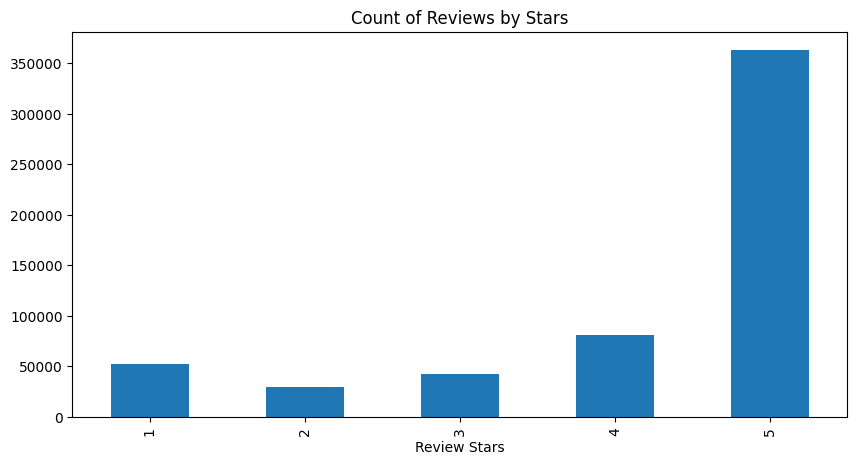

In [8]:
ax = data['Score'].value_counts().sort_index().plot(kind = 'bar', title = 'Count of Reviews by Stars', figsize = (10, 5))
ax.set_xlabel('Review Stars')
plt.show()

In [9]:
# Check null values
data.isna().sum().to_frame(name = 'Total of missing values')

,Total of missing values
Id,0
ProductId,0
UserId,0
ProfileName,26
HelpfulnessNumerator,0
HelpfulnessDenominator,0
Score,0
Time,0
Summary,27
Text,0


In [10]:
total_rows =  data.shape[0]
data.dropna(how = 'any', inplace = True)
remaining_rows = data.shape[0]

removed_rows = total_rows - remaining_rows
print("No. of rows removed:", removed_rows)

print(f"\nPercentage of data removed:{np.round ((removed_rows / total_rows)*100, 2)} %")
print(f"Percentage of data remaining:{np.round ((remaining_rows / total_rows)*100, 2)} %")

No. of rows removed: 53

Percentage of data removed:0.01 %
Percentage of data remaining:99.99 %


In [11]:
a =  data.shape[0]
data.drop_duplicates(inplace = True, subset = ['Score','Text'])
b = data.shape[0]

print("No. of rows removed:", a - b)

print(f"\nPercentage of data removed: {np.round (((a - b) / total_rows)*100, 2)} %")
print(f"Percentage of data remaining: {np.round ((b / total_rows)*100, 2)} %")

No. of rows removed: 174745

Percentage of data removed: 30.74 %
Percentage of data remaining: 69.25 %


In [12]:
a =  data.shape[0]

idx = data[data["HelpfulnessNumerator"] > data["HelpfulnessDenominator"]].index
data.drop(index = idx, inplace = True)

b = data.shape[0]

print("No. of rows removed:", a - b)

print(f"\nPercentage of data removed:{np.round(((a - b) / total_rows)*100, 2)} %")
print(f"Percentage of data remaining:{np.round((b / total_rows)*100, 2)} %")

No. of rows removed: 2

Percentage of data removed:0.0 %
Percentage of data remaining:69.25 %


In [13]:
## `Score` > 3 : "Positive" 
## `Score` == 3 : "Neutral"
## `Score` < 3 : "Negative"

def create_target(x):
    return "Positive" if x > 3 else "Negative" if x < 3 else "Neutral"

data['target'] = data['Score'].apply(create_target)

data = data[data['target'] != 'Neutral']

In [14]:
# 'target' column
data[['Score', 'target']].sample(5)

,Score,target
92101,4,Positive
21811,4,Positive
458036,5,Positive
232861,1,Negative
101566,5,Positive


In [16]:
data.to_csv(r"C:\Users\afrin\Documents\Amazon Fine Food Reviews\data\processed\Reviews.csv", index=False)

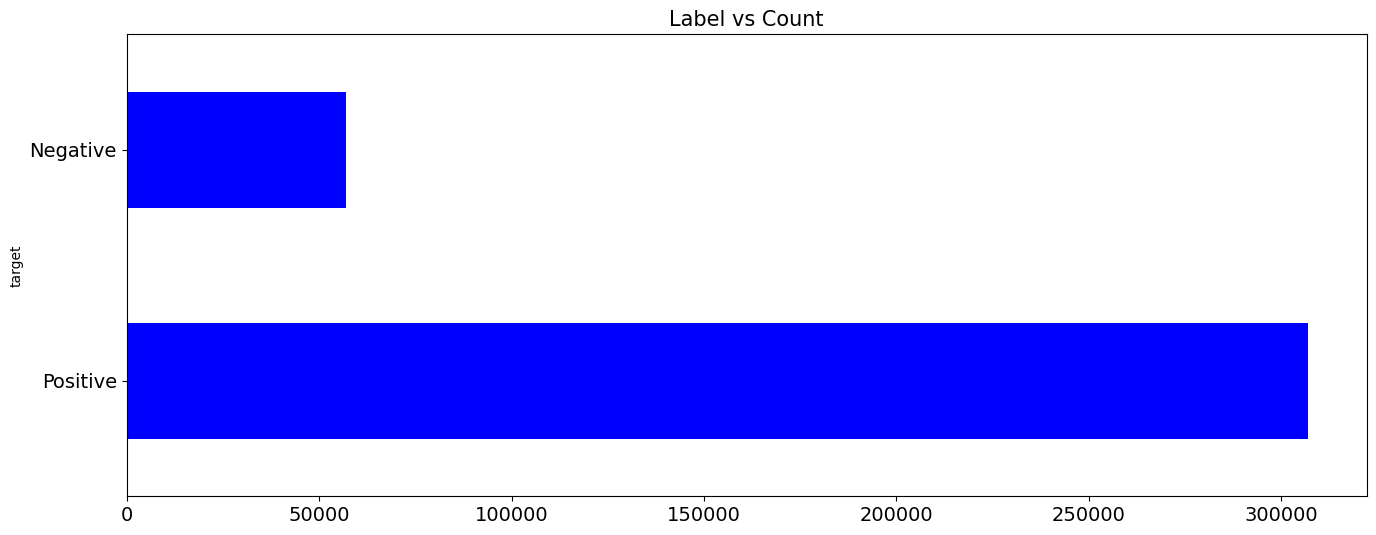

In [17]:
#Target Distribution Before
fig, ax = plt.subplots(figsize = (16, 6))

vc = data.target.value_counts()
vc.plot.barh(color = "blue", fontsize = 14, ax = ax)
ax.set_title("Label vs Count", fontsize = 15)
plt.show()

In [18]:
data.loc[data.target == "Negative"].shape[0]

57079

In [19]:
data.loc[data.target == "Positive"].shape[0]

306805

In [20]:
#Downsample by removing both positive and negative
# Count of negative samples
negative_count = data.loc[data.target == "Negative"].shape[0]

# Sample the same number of positive samples
positive = data.loc[data.target == "Positive"].sample(negative_count)

# Select all negative samples
negative = data.loc[data.target == "Negative"]

# Concatenate the dataframe
data = pd.concat([positive, negative])

In [21]:
data.shape

(114158, 11)

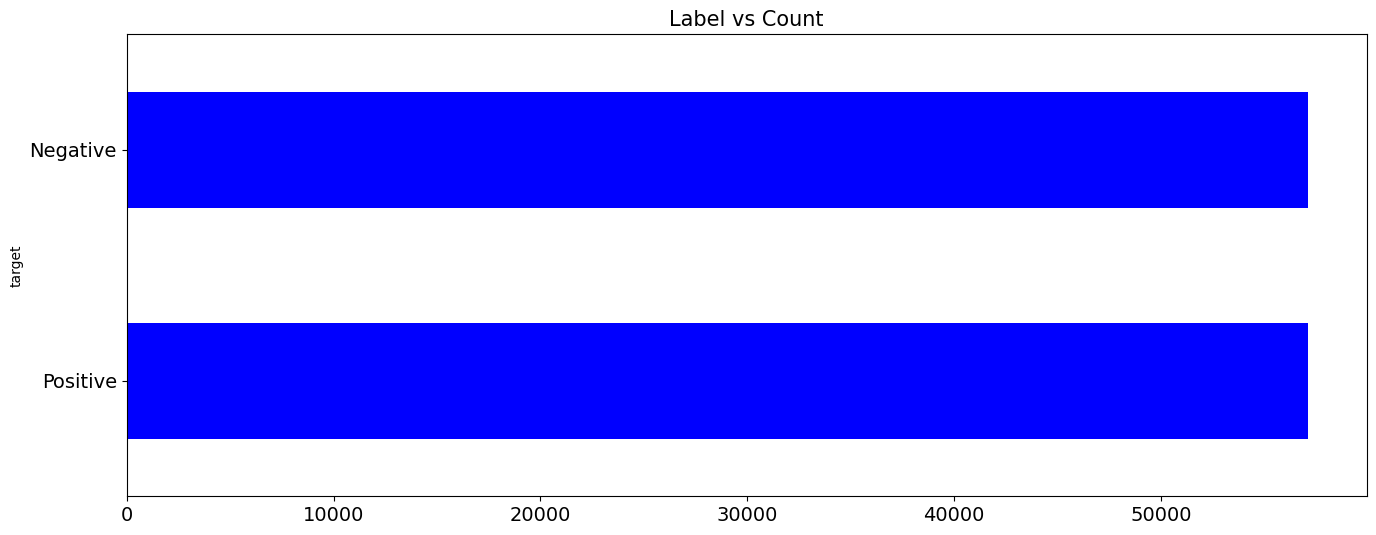

In [22]:
#Target Distribution After
fig, ax = plt.subplots(figsize = (16, 6))

vc = data.target.value_counts()
vc.plot.barh(color = "blue",fontsize=14,ax=ax)
ax.set_title("Label vs Count", fontsize=15)
plt.show()